In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.radon import radon_matrix
from pyinverse.phantom import Phantom

In [3]:
#Nx = Ny = 16
#Nx = 16
#Ny = 32

#Nx = 33
#Ny = 41

Nx = 64
Ny = 70

#Nx = 129
#Ny = 201

#Nx = 33
#Ny = 33

t_max = 1
#t_max = 2
#Np = 5
#Np = 3
#Na = 45
#Na = 2
#Na = 4
#Na = 3

Na = 40
Np = 45

#Np = 11
#Na = 40

In [4]:
axis_x = RegularAxis.linspace(-1, 1, Nx)
axis_y = RegularAxis.linspace(-1, 1, Ny)
axis_t = RegularAxis.linspace(-t_max, t_max, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [5]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [6]:
grid

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.031746031746031744 N=64>> <axis_y: <RegularAxis x0=-1 T=0.028985507246376812 N=70>>>

In [7]:
H = radon_matrix(grid, grid_y)

100%|█████████████████████████████████████████████████████████████████| 70/70 [00:08<00:00,  7.87it/s]


<IPython.core.display.Javascript object>


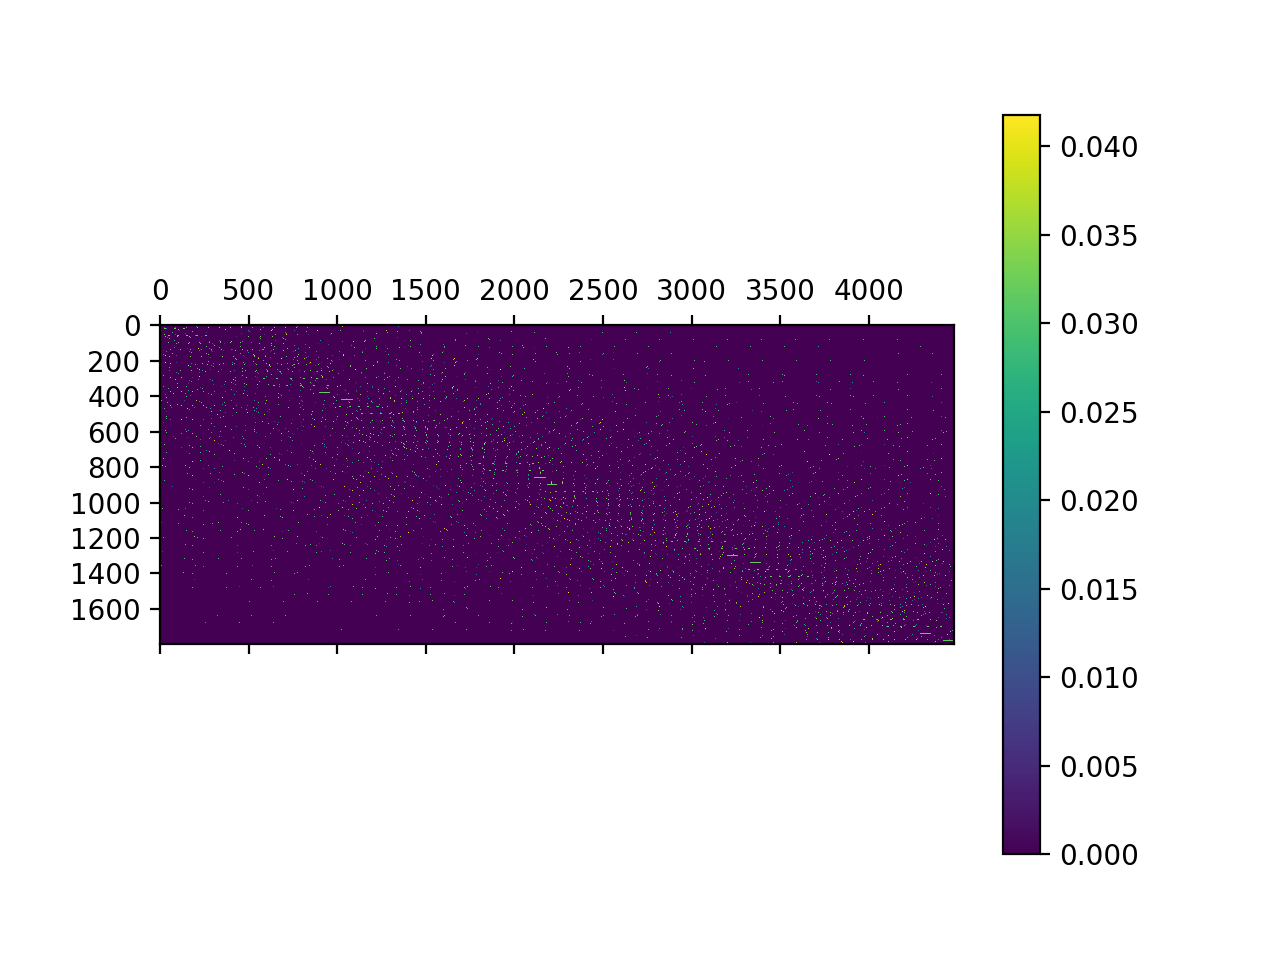

In [8]:
fig, ax = plt.subplots()
im = ax.matshow(H.todense())
fig.colorbar(im);

In [9]:
p = Phantom()
x = p.raster(grid)

<IPython.core.display.Javascript object>


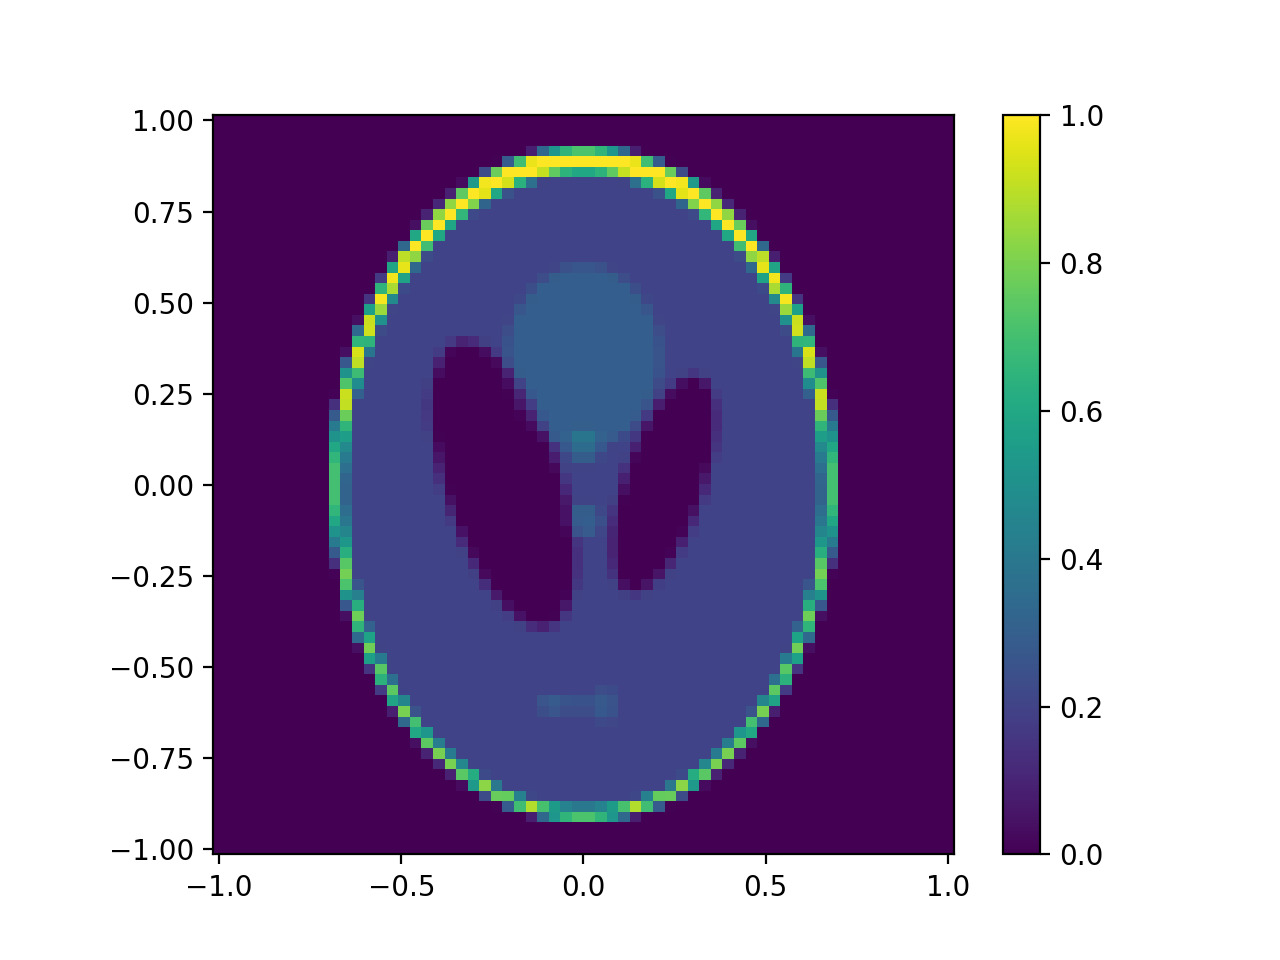

In [10]:
fig, ax = plt.subplots()
im = grid.plot(ax, x)
fig.colorbar(im);

In [11]:
y = p.sinogram(grid_y)

<IPython.core.display.Javascript object>


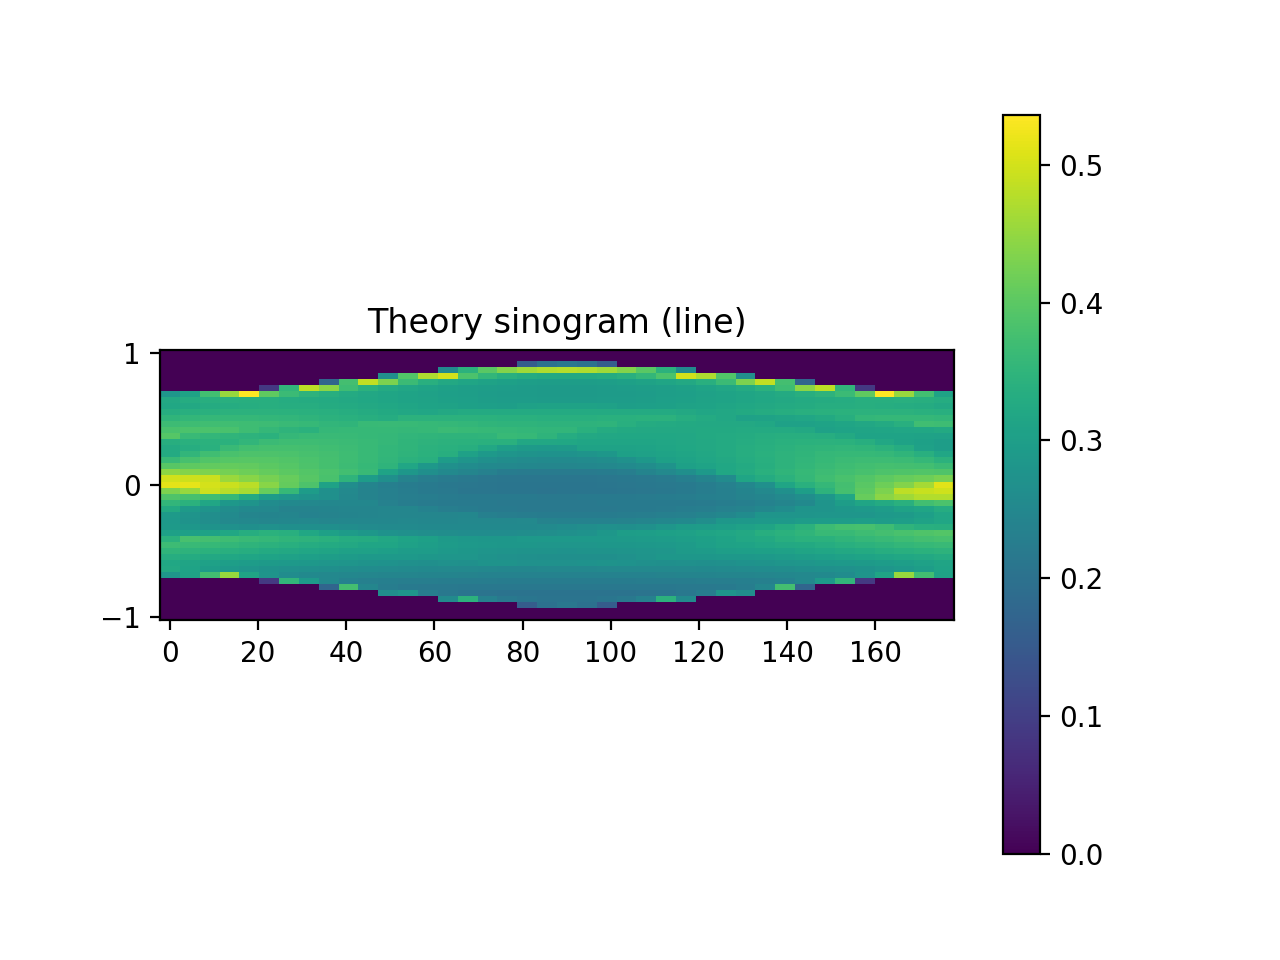

In [12]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y)
ax.set_aspect(30)
ax.set_title('Theory sinogram (line)')
fig.colorbar(im);

In [13]:
y_matrix = H @ x.flat
y_matrix.shape = Np, Na

<IPython.core.display.Javascript object>


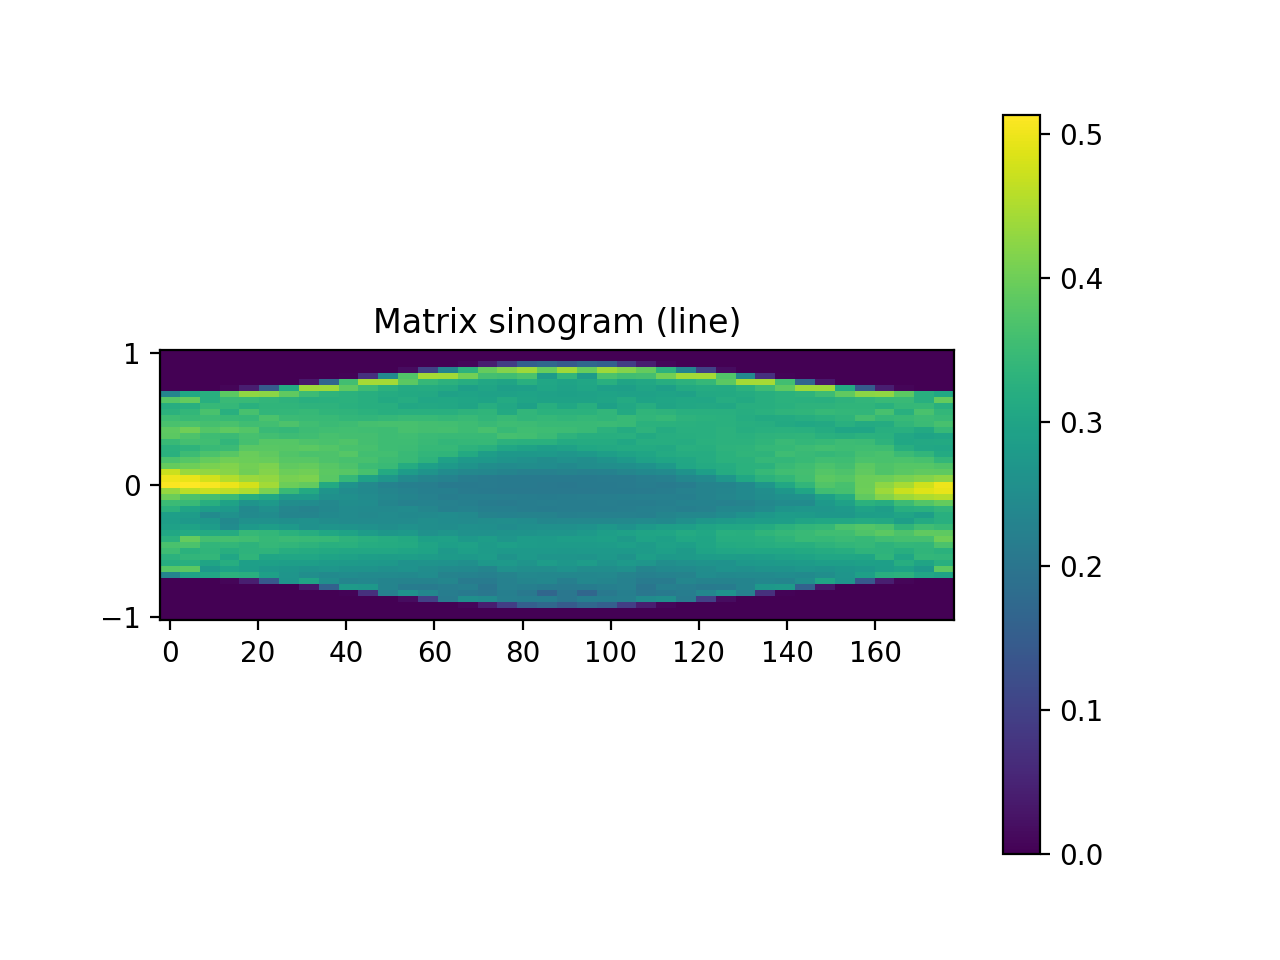

In [14]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y_matrix)
ax.set_aspect(30)
ax.set_title('Matrix sinogram (line)')
fig.colorbar(im);

In [15]:
grid

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.031746031746031744 N=64>> <axis_y: <RegularAxis x0=-1 T=0.028985507246376812 N=70>>>

In [16]:
H_beam = radon_matrix(grid, grid_y, a=1 / grid_y.axis_y.T)

100%|█████████████████████████████████████████████████████████████████| 70/70 [00:38<00:00,  1.83it/s]


<IPython.core.display.Javascript object>


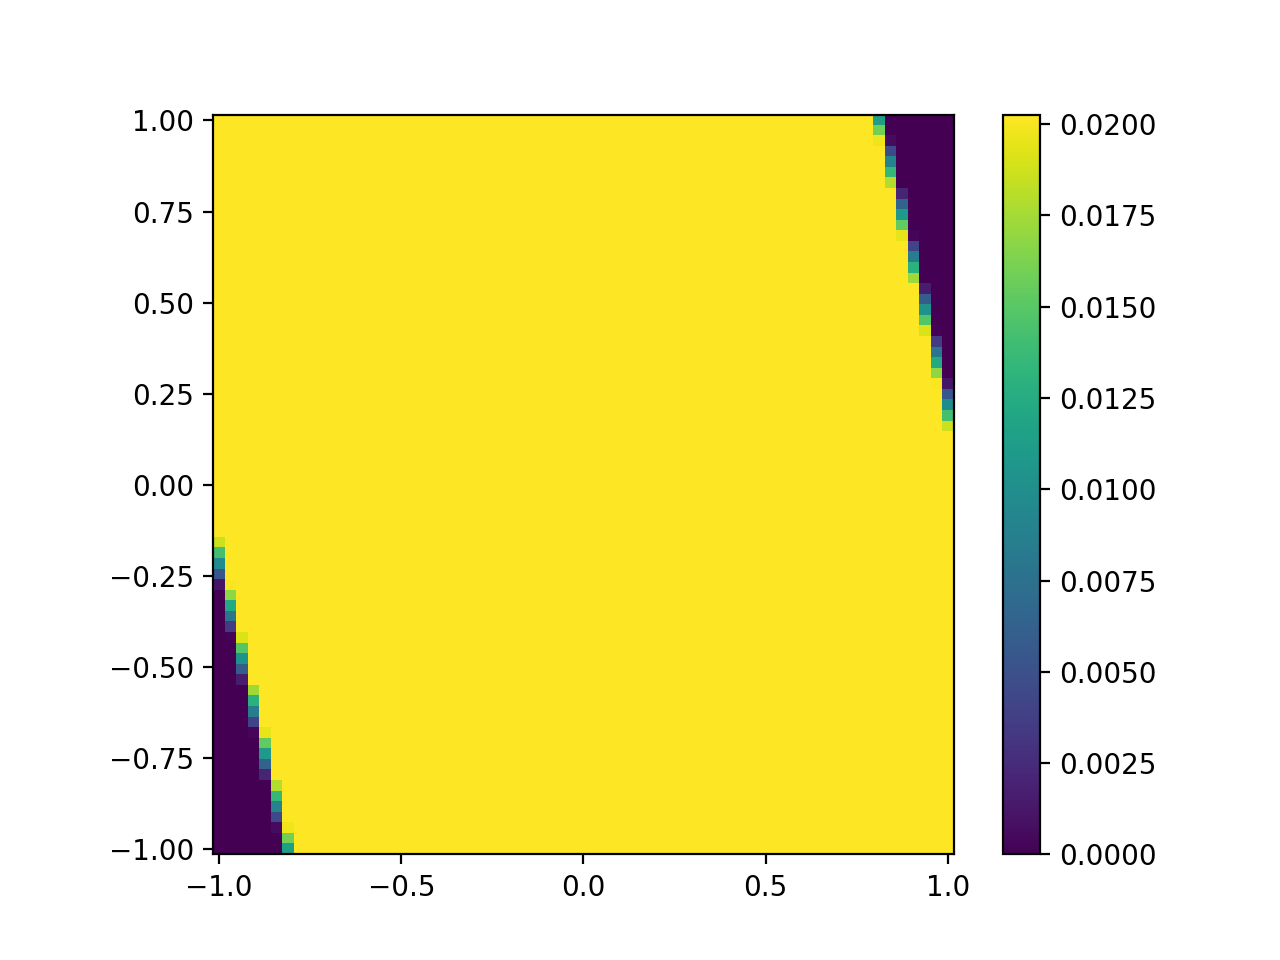

In [17]:
Z = np.zeros((Ny, Nx))
for i in range(Np):
    Z += H_beam[3 + i*Na, :].reshape(Ny, Nx) 
    
fig, ax = plt.subplots()
im = grid.plot(ax, Z)
fig.colorbar(im, ax=ax);

<IPython.core.display.Javascript object>


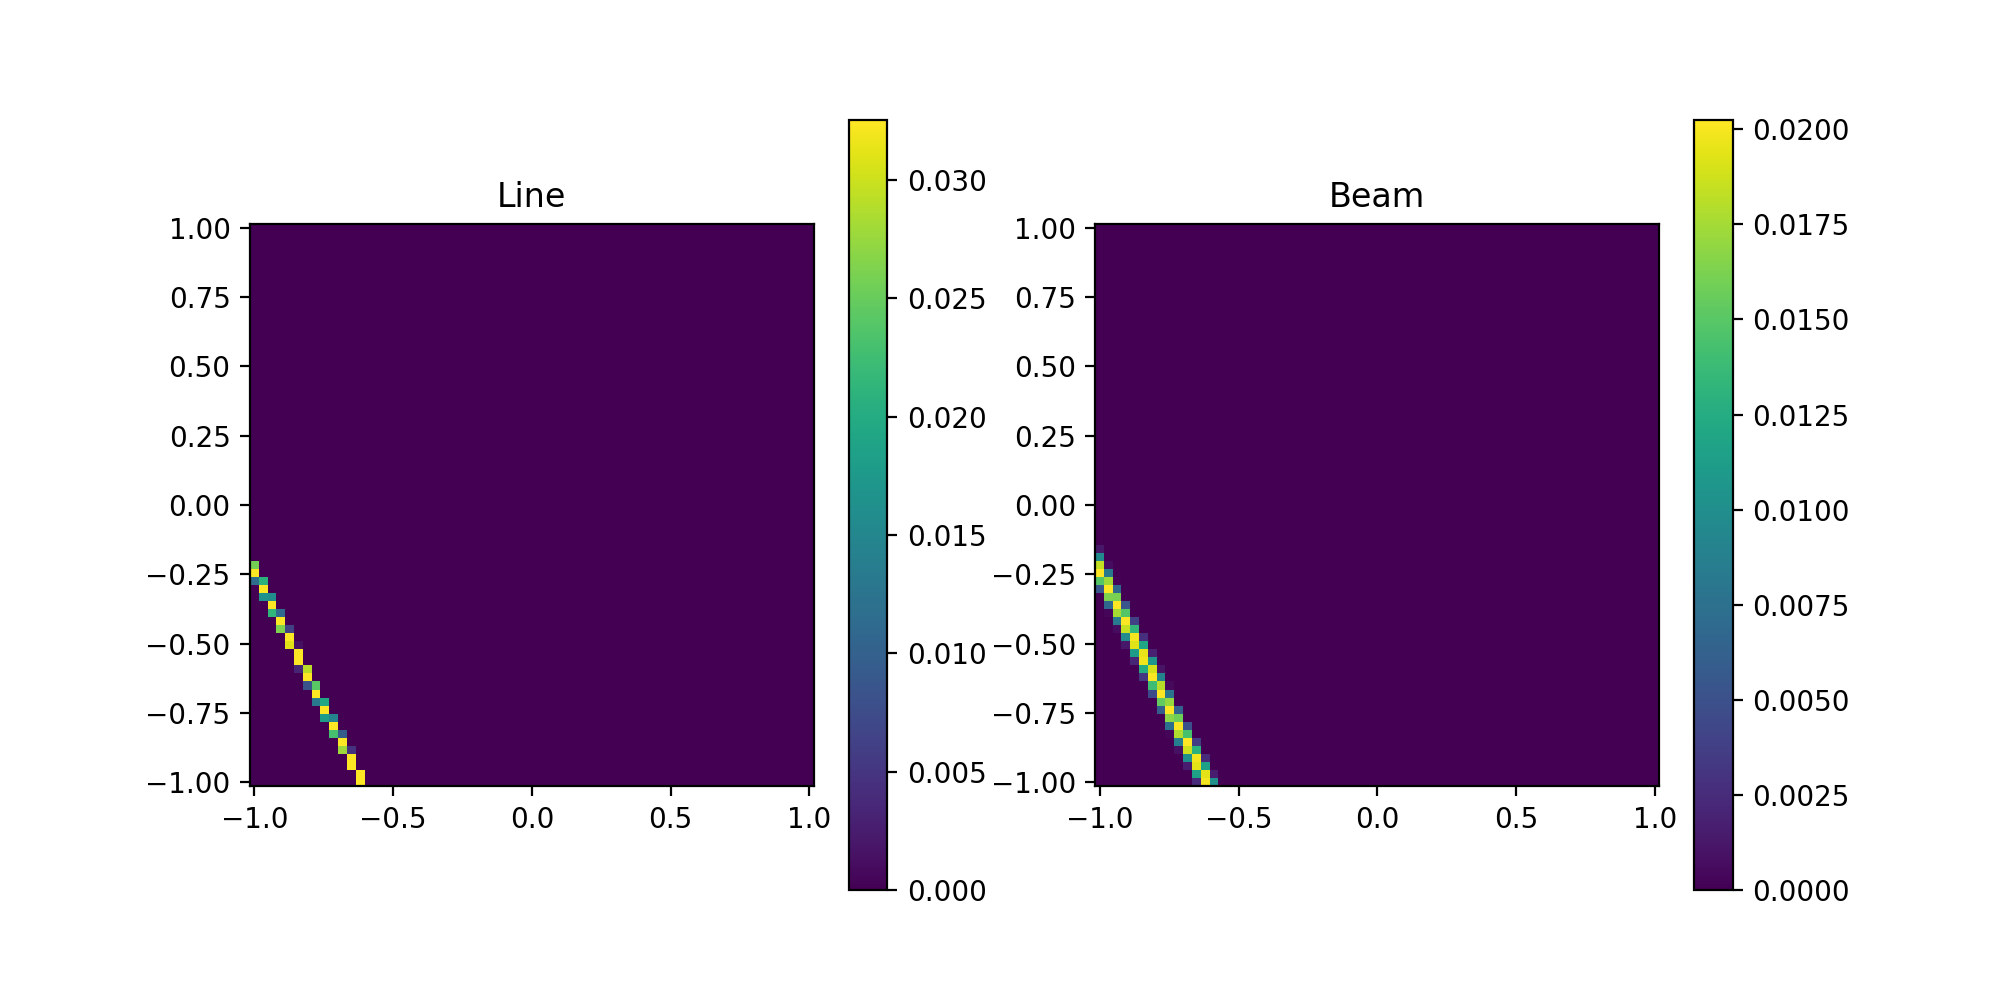

In [18]:
index = 0 + 3 + 3
#index = 5*Na

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
im0 = grid.plot(ax[0], H[index, :].todense().reshape(Ny, Nx))
ax[0].set_title('Line')
fig.colorbar(im0, ax=ax[0])
im1 = grid.plot(ax[1], H_beam[index, :].todense().reshape(Ny, Nx))
ax[1].set_title('Beam')
fig.colorbar(im1, ax=ax[1]);

In [19]:
y_rect = p.sinogram(grid_y, rect=True, a=1/grid_y.axis_y.T)

<IPython.core.display.Javascript object>


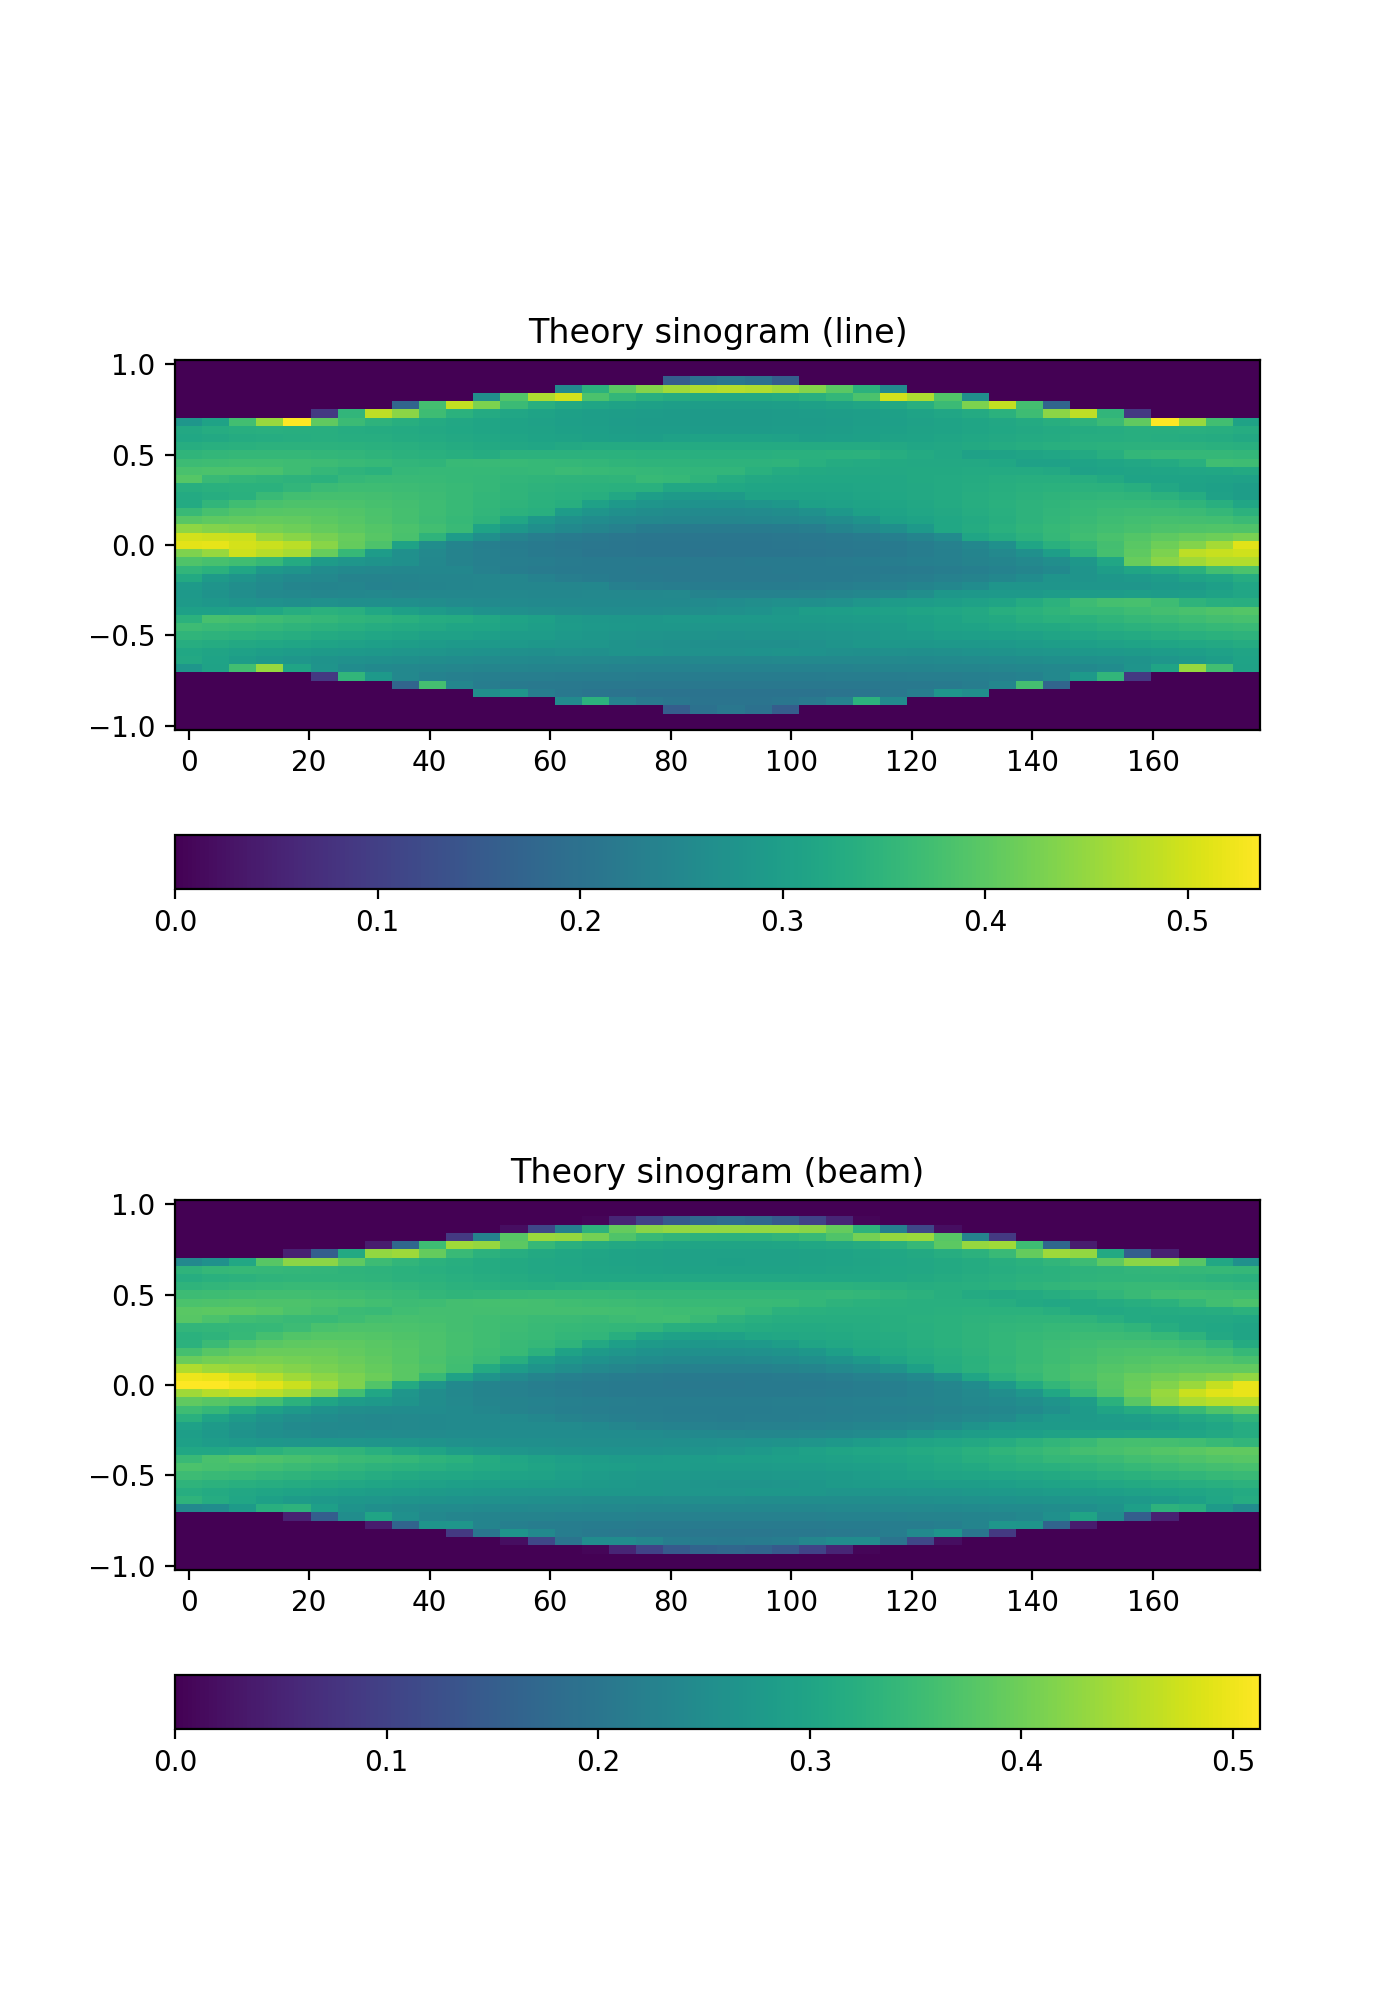

In [20]:
fig, ax = plt.subplots(nrows=2, figsize=(7, 10))
im0 = grid_y.plot(ax[0], y)
ax[0].set_aspect(30)
ax[0].set_title('Theory sinogram (line)')
fig.colorbar(im0, ax=ax[0], orientation='horizontal')
im1 = grid_y.plot(ax[1], y_rect)
ax[1].set_aspect(30)
ax[1].set_title('Theory sinogram (beam)')
fig.colorbar(im1, ax=ax[1], orientation='horizontal');

In [21]:
y_matrix_beam = H_beam @ x.flat
y_matrix_beam.shape = Np, Na

<IPython.core.display.Javascript object>


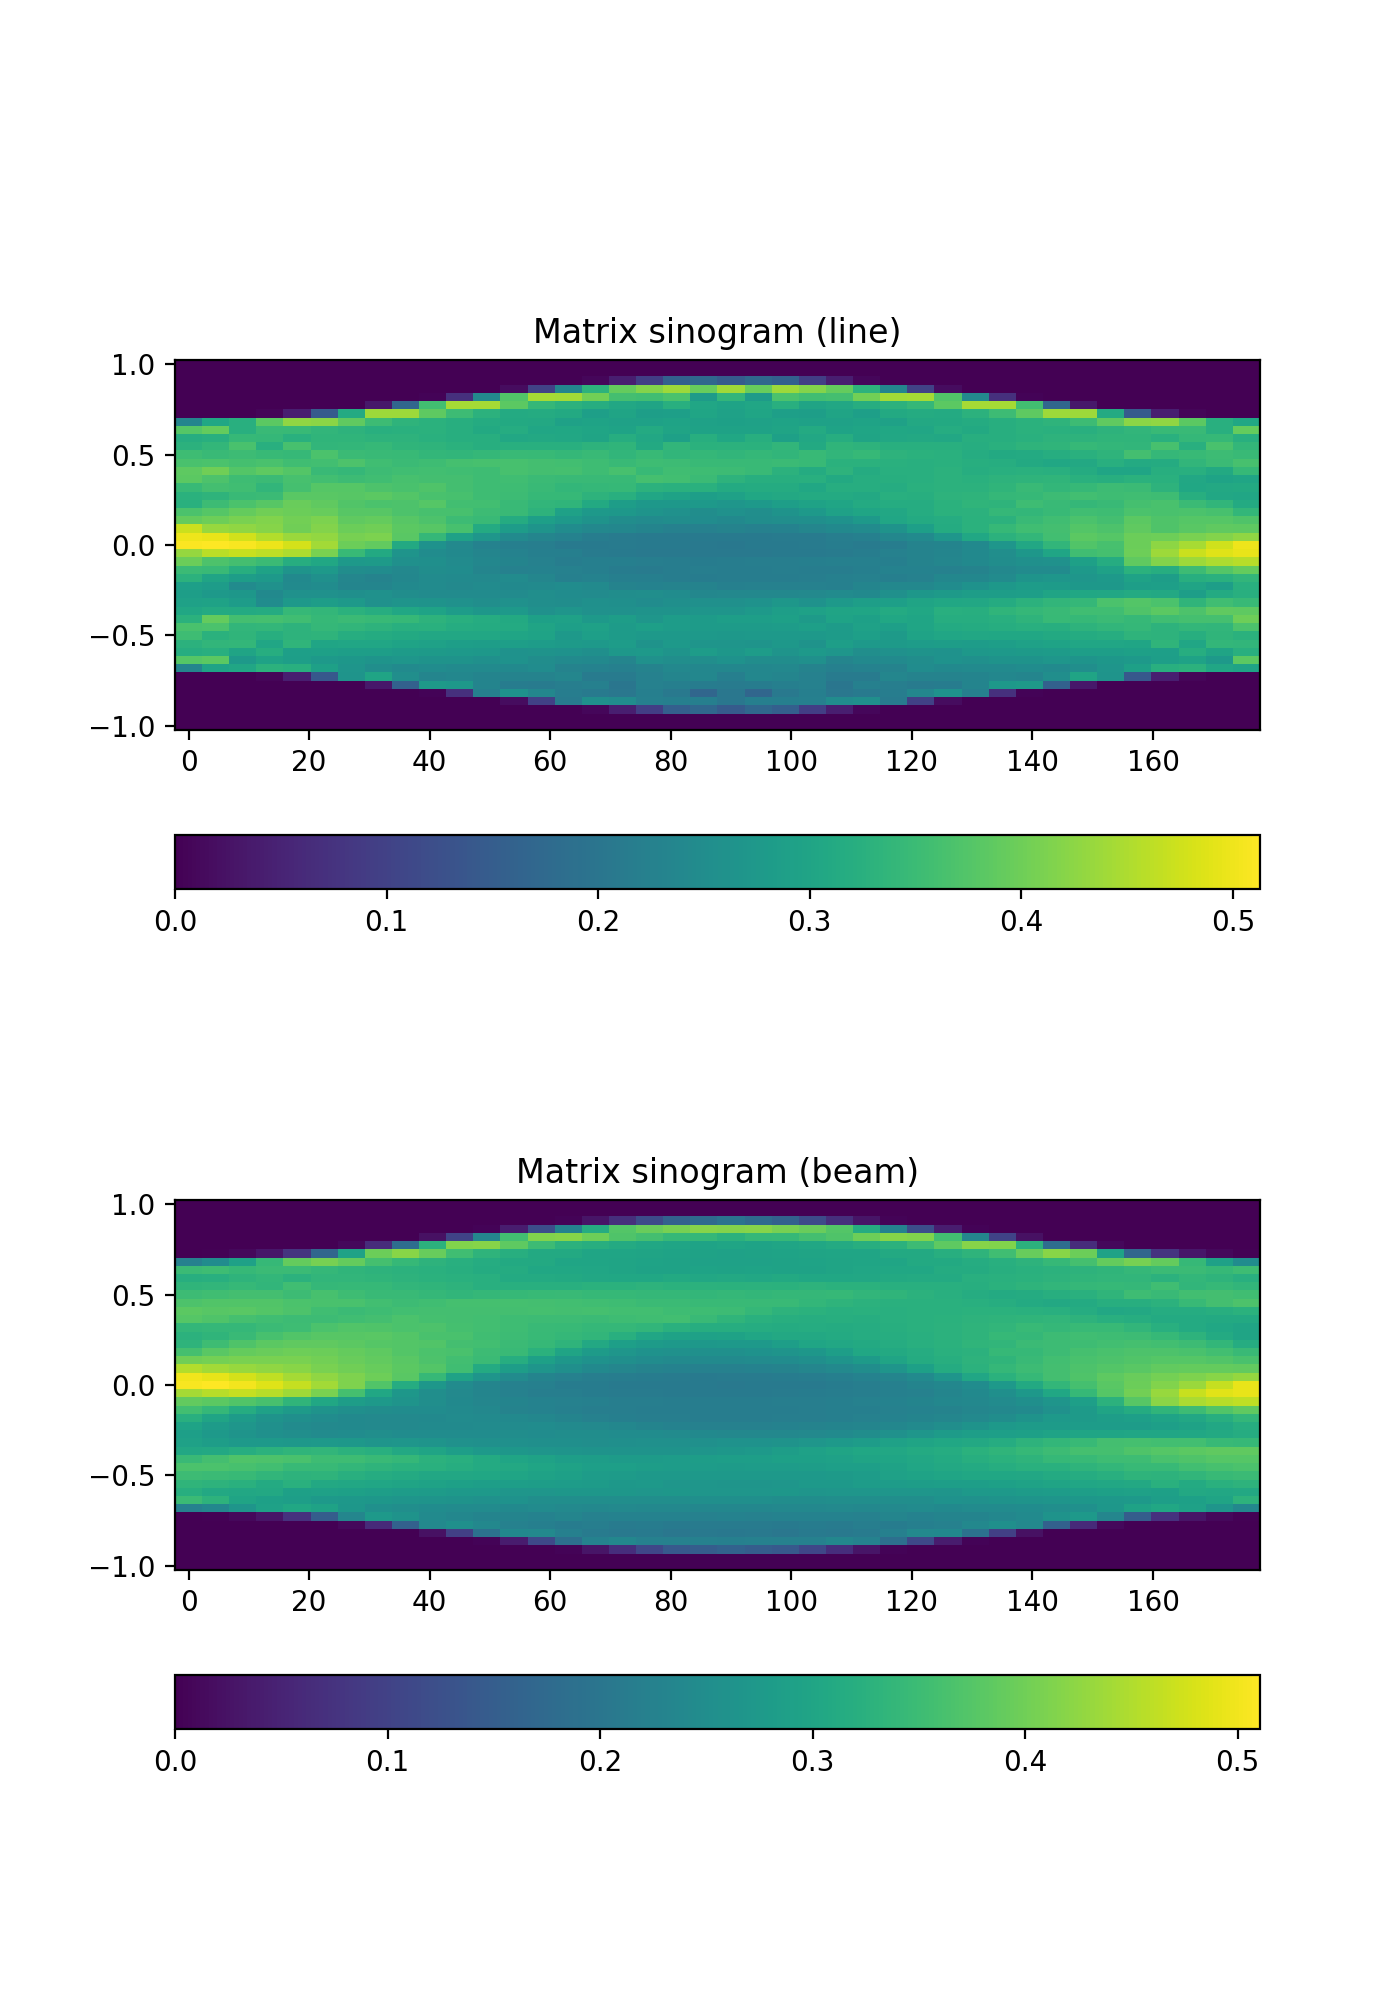

In [22]:
fig, ax = plt.subplots(nrows=2, figsize=(7, 10))
im0 = grid_y.plot(ax[0], y_matrix)
ax[0].set_aspect(30)
ax[0].set_title('Matrix sinogram (line)')
fig.colorbar(im0, ax=ax[0], orientation='horizontal')
im1 = grid_y.plot(ax[1], y_matrix_beam)
ax[1].set_aspect(30)
ax[1].set_title('Matrix sinogram (beam)')
fig.colorbar(im1, ax=ax[1], orientation='horizontal');